In [33]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from airclub_class import AeroclubPipeline

from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns

# перезагрузка модуля 
import importlib, sys
AeroclubPipeline = importlib.reload(sys.modules['airclub_class']).AeroclubPipeline

### Зазгузка датасета

In [5]:
df = pd.read_excel('./Data/RequestAgent.xlsx')

### Разобъем датасет на тест и трейн

Данные представлены за 6 месяцев. Возьмем на тест последний месяц, остальные оставим на обучение.

In [6]:
df.RequestDate = pd.to_datetime(df.RequestDate)

In [7]:
train_df = df[df.RequestDate < pd.to_datetime('2022-11-30')]
test_df = df[df.RequestDate >= pd.to_datetime('2022-11-30')]

In [8]:
train_target = train_df['SentOption']
test_target = test_df['SentOption']

In [9]:
len(train_df.RequestID.unique()),  len(test_df.RequestID.unique())

(9265, 874)

### Загрузим модель и подготовим новые фичи

In [2]:
pipeline = AeroclubPipeline()

In [23]:
train_df = pipeline.transform(train_df)

Set timezones 4/4: 100%|██████████████████████| 153/153 [00:07<00:00, 20.72it/s]


In [ ]:
pipeline.fit(train_df, train_target)

In [ ]:
# pipeline.save_model('./Project/Model/ctb_clsf_model.cbm')

In [3]:
pipeline.load_model('./Model/ctb_clsf_model.cbm')

In [10]:
test_df = pipeline.transform(test_df)

Set timezones 4/4: 100%|████████████████████████| 44/44 [00:00<00:00, 65.22it/s]


In [94]:
test_predict = pipeline.predict(test_df)

In [96]:
print(classification_report(test_target, test_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     55329
           1       0.23      0.02      0.04      2028

    accuracy                           0.96     57357
   macro avg       0.60      0.51      0.51     57357
weighted avg       0.94      0.96      0.95     57357



In [27]:
from catboost import CatBoostClassifier, Pool
# ctb_clsf_model = CatBoostClassifier(random_seed=42, cat_features=pipeline.cat_feats, silent=False,
#                                    depth=5, l2_leaf_reg=3, learning_rate=0.03, iterations=500, use_best_model=True,
#                                    early_stopping_rounds=10)


In [51]:
train_pool.get_feature_names()

['Amount',
 'To_flight_dur',
 'Return_flight_dur',
 'diff_betw_dep_time',
 'diff_betw_arr_time',
 'One_sec_cost',
 'SegmentCount',
 'IsBaggage',
 'isRefundPermitted',
 'isExchangePermitted',
 'isDiscount',
 'InTravelPolicy',
 'SearchRouteFrom1',
 'SearchRouteTo1',
 'SearchRouteFrom2',
 'SearchRouteTo2',
 'Airlanes_enc']

In [52]:
train_df

,Amount,To_flight_dur,Return_flight_dur,diff_betw_dep_time,diff_betw_arr_time,One_sec_cost,SegmentCount,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SearchRouteFrom1,SearchRouteTo1,SearchRouteFrom2,SearchRouteTo2,Airlanes_enc
0,14356.0,11400.0,10500.0,6900.0,1.770000e+04,1.259298,2,0.0,1.0,1.0,0,1,TJM,LED,LED,TJM,844
1,23712.0,11400.0,10500.0,0.0,1.770000e+04,2.080000,2,1.0,1.0,1.0,0,0,TJM,LED,LED,TJM,841
2,21485.0,11400.0,10500.0,0.0,1.770000e+04,1.884649,2,1.0,1.0,1.0,1,0,TJM,LED,LED,TJM,841
3,18212.0,11400.0,10500.0,0.0,1.770000e+04,1.597544,2,1.0,1.0,9999.0,0,0,TJM,LED,LED,TJM,841
4,17360.0,11400.0,10500.0,0.0,1.770000e+04,1.522807,2,1.0,1.0,1.0,1,1,TJM,LED,LED,TJM,841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580040,15713.0,6600.0,0.0,52800.0,3.878815e+09,2.380758,1,1.0,9999.0,9999.0,0,1,MMK,LED,,,841
580041,11333.0,6600.0,0.0,43500.0,3.878805e+09,1.717121,1,1.0,9999.0,9999.0,0,1,MMK,LED,,,841
580042,14333.0,6600.0,0.0,43500.0,3.878805e+09,2.171667,1,1.0,9999.0,9999.0,0,1,MMK,LED,,,841
580043,12713.0,6600.0,0.0,74100.0,3.878836e+09,1.926212,1,1.0,9999.0,9999.0,0,1,MMK,LED,,,841


In [30]:

categorical_features = pipeline.cat_feats

train_pool = Pool(train_df, train_target, categorical_features)
test_pool = Pool(test_df, test_target, categorical_features)

ctb_clsf_model = CatBoostClassifier(iterations=500, max_depth=5, learning_rate=0.05, random_seed=42)
ctb_clsf_model.fit(train_df, train_target, eval_set=test_pool, cat_features=categorical_features, use_best_model=True, early_stopping_rounds=10)


0:	learn: 0.6078003	test: 0.5970795	best: 0.5970795 (0)	total: 650ms	remaining: 5m 24s
1:	learn: 0.5435937	test: 0.5286731	best: 0.5286731 (1)	total: 1.26s	remaining: 5m 13s
2:	learn: 0.4930607	test: 0.4787015	best: 0.4787015 (2)	total: 1.68s	remaining: 4m 38s
3:	learn: 0.4357631	test: 0.4141762	best: 0.4141762 (3)	total: 2.3s	remaining: 4m 45s
4:	learn: 0.3937721	test: 0.3629848	best: 0.3629848 (4)	total: 2.98s	remaining: 4m 55s
5:	learn: 0.3544856	test: 0.3186319	best: 0.3186319 (5)	total: 3.54s	remaining: 4m 51s
6:	learn: 0.3254188	test: 0.2872744	best: 0.2872744 (6)	total: 4.07s	remaining: 4m 46s
7:	learn: 0.2978495	test: 0.2584835	best: 0.2584835 (7)	total: 4.82s	remaining: 4m 56s
8:	learn: 0.2769320	test: 0.2369705	best: 0.2369705 (8)	total: 5.47s	remaining: 4m 58s
9:	learn: 0.2571559	test: 0.2180203	best: 0.2180203 (9)	total: 6.32s	remaining: 5m 9s
10:	learn: 0.2421561	test: 0.2031294	best: 0.2031294 (10)	total: 7.18s	remaining: 5m 19s
11:	learn: 0.2301190	test: 0.1911995	best: 

93:	learn: 0.1229306	test: 0.1186580	best: 0.1186580 (93)	total: 54.2s	remaining: 3m 54s
94:	learn: 0.1228214	test: 0.1187095	best: 0.1186580 (93)	total: 54.6s	remaining: 3m 52s
95:	learn: 0.1226867	test: 0.1187507	best: 0.1186580 (93)	total: 54.9s	remaining: 3m 51s
96:	learn: 0.1225988	test: 0.1187315	best: 0.1186580 (93)	total: 55.5s	remaining: 3m 50s
97:	learn: 0.1225112	test: 0.1185684	best: 0.1185684 (97)	total: 56.1s	remaining: 3m 50s
98:	learn: 0.1223720	test: 0.1185369	best: 0.1185369 (98)	total: 56.7s	remaining: 3m 49s
99:	learn: 0.1222629	test: 0.1185154	best: 0.1185154 (99)	total: 57.3s	remaining: 3m 49s
100:	learn: 0.1222076	test: 0.1184985	best: 0.1184985 (100)	total: 58s	remaining: 3m 49s
101:	learn: 0.1220113	test: 0.1184881	best: 0.1184881 (101)	total: 58.7s	remaining: 3m 48s
102:	learn: 0.1219162	test: 0.1185293	best: 0.1184881 (101)	total: 59.2s	remaining: 3m 48s
103:	learn: 0.1218407	test: 0.1185273	best: 0.1184881 (101)	total: 59.8s	remaining: 3m 47s
104:	learn: 0.1

Text(0.5, 1.0, 'Feature Importance')

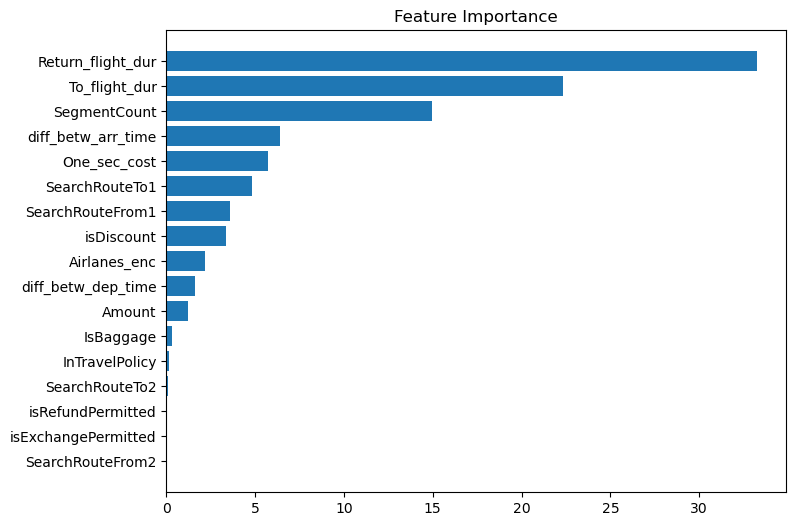

In [47]:
feature_importance = ctb_clsf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test_df.columns)[sorted_idx])
plt.title('Feature Importance')


In [38]:
full_df = pd.concat([train_df, train_target], axis=1)

In [43]:
analyse_df = df.drop(columns= ['RequestID', 'EmployeeId', 'ClientID'] )

<Axes: >

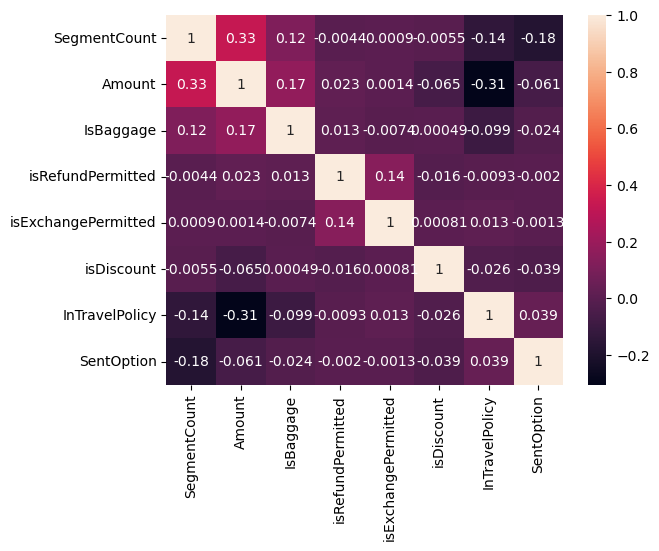

In [46]:
sns.heatmap(analyse_df.corr(), annot = True)

### Загрузка и обработка тестового датасета

In [118]:
check_df = pd.read_excel('./test_to_check.xlsx')

In [123]:
check_df.head(2)

,ID,RequestID,EmployeeId,RequestDate,ClientID,TravellerGrade,SearchRoute,RequestDepartureDate,RequestReturnDate,FligtOption,...,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,Position ( from 1 to n)
0,1,4237570,3498,2022-06-06 15:17:03.833,1952,NaN,ALAMOW,2022-06-24 00:00:00.000,NaN,SU6536 ALASVO 2022.06.24,...,NaN,1,53181.0,E,1,0.0,1.0,0,1,NaN
1,2,4237570,3498,2022-06-06 15:17:03.833,1952,NaN,ALAMOW,2022-06-24 00:00:00.000,NaN,DV0815 ALAVKO 2022.06.24,...,NaN,1,26247.0,E,1,NaN,NaN,0,1,NaN


In [120]:
check_df.rename(columns={'ValueRu':'TravellerGrade'}, inplace=True)

In [121]:
check_df.columns

Index(['ID', 'RequestID', 'EmployeeId', 'RequestDate', 'ClientID',
       'TravellerGrade', 'SearchRoute', 'RequestDepartureDate',
       'RequestReturnDate', 'FligtOption', 'DepartureDate', 'ArrivalDate',
       'ReturnDepatrureDate', 'ReturnArrivalDate', 'SegmentCount', 'Amount',
       'class', 'IsBaggage', 'isRefundPermitted', 'isExchangePermitted',
       'isDiscount', 'InTravelPolicy', 'Position ( from 1 to n)'],
      dtype='object')

In [232]:
requests = check_df.RequestID.unique()
result_df = pd.DataFrame(columns=check_df.columns.to_list())

for req in requests:
    n_rows = check_df.loc[check_df.RequestID == req].shape[0]
    sort_df = check_df.loc[check_df.RequestID == req].sort_values(['proba'], ascending=False).reset_index()
    nummeric = pd.Series([i for i in range(1, n_rows+1)])
    result_df = result_df.append(pd.concat([sort_df, nummeric], axis=1))
    

In [ ]:
result_df.drop(columns=['Position ( from 1 to n)', 'proba', 'index'], inplace=True)

In [236]:
result_df.rename(columns={0: 'Position ( from 1 to n)'}, inplace=True)
result_df.head(2)

,ID,RequestID,EmployeeId,RequestDate,ClientID,TravellerGrade,SearchRoute,RequestDepartureDate,RequestReturnDate,FligtOption,...,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,Position ( from 1 to n)
0,3,4237570,3498,2022-06-06 15:17:03.833,1952,NaN,ALAMOW,2022-06-24 00:00:00.000,NaN,SU6536 ALASVO 2022.06.24,...,NaN,1,57641.0,E,1,0.0,1.0,0,1,1.0
1,1,4237570,3498,2022-06-06 15:17:03.833,1952,NaN,ALAMOW,2022-06-24 00:00:00.000,NaN,SU6536 ALASVO 2022.06.24,...,NaN,1,53181.0,E,1,0.0,1.0,0,1,2.0


In [244]:
pipeline.get_xls_result(check_df, './result.xls')

Set timezones 4/4: 100%|███████████████████████| 11/11 [00:00<00:00, 169.35it/s]
